In [1]:
from fastai.vision import *
from pathlib import Path
import torch

import matplotlib.image as mpimg
import matplotlib.pyplot as plot
from skimage import transform

In [2]:
path = Path('..') / 'data' / 'dataset' / 'good' / 'train_x' / 'models'
path

WindowsPath('../data/dataset/good/train_x/models')

In [3]:
fname = 'fp16-2_bs24_rnet18.pkl'
state = torch.load(path / fname, map_location = 'cpu')
state

{'opt_func': functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)),
 'loss_func': FlattenedLoss of CrossEntropyLoss(),
 'metrics': [<function fastai.metrics.dice(input: torch.Tensor, targs: torch.Tensor, iou: bool = False, eps: float = 1e-08) -> <function NewType.<locals>.new_type at 0x0000019A64741280>>],
 'true_wd': True,
 'bn_wd': True,
 'wd': 0.01,
 'train_bn': True,
 'model_dir': 'models',
 'callback_fns': [functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)],
 'cb_state': {fastai.callbacks.fp16.MixedPrecision: {'flat_master': False,
   'dynamic': True,
   'max_noskip': 1000,
   'clip': None,
   'max_scale': 16777216,
   'loss_fp32': True,
   'loss_scale': 65536,
   'opt': None}},
 'model': DynamicUnet(
   (layers): ModuleList(
     (0): Sequential(
       (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
       (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [4]:
model = state.pop('model')
model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [5]:
model.eval()

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [6]:
for parameter in model.parameters():
    print(parameter.shape)

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
t

In [7]:
pname = 'fp16-2_bs24_rnet18.pth'
loaded_model = torch.load(path / pname, map_location='cpu')
loaded_model

{'model': OrderedDict([('layers.0.0.weight',
               tensor([[[[-1.0422e-02, -6.1340e-03, -1.8101e-03,  ...,  5.6610e-02,
                           1.7090e-02, -1.2695e-02],
                         [ 1.1086e-02,  9.5291e-03, -1.0992e-01,  ..., -2.7124e-01,
                          -1.2903e-01,  3.7422e-03],
                         [-6.9427e-03,  5.9082e-02,  2.9541e-01,  ...,  5.1953e-01,
                           2.5635e-01,  6.3599e-02],
                         ...,
                         [-2.7542e-02,  1.6052e-02,  7.2571e-02,  ..., -3.3276e-01,
                          -4.2065e-01, -2.5781e-01],
                         [ 3.0609e-02,  4.0955e-02,  6.2866e-02,  ...,  4.1382e-01,
                           3.9355e-01,  1.6602e-01],
                         [-1.3733e-02, -3.6755e-03, -2.4078e-02,  ..., -1.5076e-01,
                          -8.2214e-02, -5.7831e-03]],
               
                        [[-1.1398e-02, -2.6627e-02, -3.4637e-02,  ...,  3.2532e-02,
  

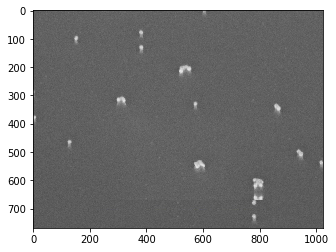

In [8]:
test_data = Path('..') / 'data' / 'dataset' / 'test_x' / 'L2_d629a43bffec9b91a308f3aaf344f3eb.jpg'
img = mpimg.imread(test_data)
plt.imshow(img)

In [9]:
img = transform.resize(img, (192, 256), order=1)
img = torch.HalfTensor(img)
img = img.permute(2, 0, 1)
img.shape

torch.Size([3, 192, 256])

In [10]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 192, 256])

In [12]:
model(img)

RuntimeError: "unfolded2d_copy" not implemented for 'Half'

In [22]:
learn.path

WindowsPath('..')

In [24]:
learn.save('stage-2_bs16')

In [25]:
firstlayer = layers[0][0]
firstlayer

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [26]:
firstlayer.parameters()

<generator object Module.parameters at 0x00000221F3444AC0>

In [27]:
print(firstlayer.parameters())

<generator object Module.parameters at 0x00000221F58F6C80>


In [28]:
for i in firstlayer.parameters():
    print(i)

Parameter containing:
tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
            3.0660e-02,  2.5398e-02],
          [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
            2.9754e-02,  4.1735e-02],
          [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
           -1.1601e-01, -1.2191e-01],
          ...,
          [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
            2.4631e-03,  1.6726e-02],
          [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
            7.3973e-02,  5.9085e-02],
          [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
            8.3749e-02,  9.6970e-02]],

         [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
            2.5483e-02,  2.4275e-02],
          [ 5.3961e-02,  4.4677e-02,  3.4326e-02,  ...,  1.3392e-02,
            1.9135e-02,  3.7995e-02],
          [ 1.0251e-03, -5.4513e-02, -1.0225e-01,  ..., -1.9231e-01,
           -1.9994e-01, -1.8192e-01]

In [30]:
len(layers[0])

8

In [32]:
torch.save(layers.state_dict(), path / 'models' / 'torchmodel.pth')

In [37]:
layers[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [50]:
n_list = []
for parameters in layers.parameters():
    n = 1
    for dim in parameters.size():
        n *= dim
    n_list.append(n)
print(f'{sum(n_list):.2E}')

4.12E+07


In [51]:
print(layers)

ModuleList(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  